<a href="https://colab.research.google.com/github/coderhouse2025-droid/ProyectoDS_ParteI_orellana.ipynb/blob/main/Proyecto_ParteIII_orellana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROYECTO FINAL - VISUALIZACIONES EN PYTHON**                             
**ENTREGA FINAL**

## **Abstract**

Este estudio tiene como objetivo identificar los factores clave que influyen en la ganancia de Supertienda y desarrollar modelos predictivos para estimar la rentabilidad de las transacciones. Basándome en un análisis exploratorio de datos de las ventas de Supertienda, poniendo el foco en variables como 'Fecha del pedido', 'Forma de envío', 'Segmento', 'País/Región', 'Región', 'Subcategoría', 'Venta' y 'Ganancia'.

La metodología incluyó:

1.  **Análisis Exploratorio de Datos (EDA):** Examine la distribución de la ganancia, se calcule la correlación entre 'Venta' y 'Ganancia', y analice las ganancias promedio por categorías en las variables cualitativas utilizando visualizaciones (histogramas, gráficos de barras, box plots) y estadísticas descriptivas.
2.  **Preparación de Datos para Modelado:** Seleccione las características y la variable objetivo ('Ganancia'). Las variables categóricas fueron transformadas utilizando codificación one-hot para ser utilizadas en modelos de regresión.
3.  **Desarrollo y Evaluación de Modelos de Regresión:** Implemente y entrene tres modelos de regresión:
    *   **Regresión Lineal:** Un modelo lineal simple para establecer una línea base de rendimiento.
    *   **Random Forest:** Un modelo de conjunto más robusto capaz de capturar relaciones no lineales.
    *   **CatBoost:** Un modelo que maneja variables categóricas eficientemente y a menudo produce resultados de alta precisión.

  Todos los modelos fueron evaluados utilizando métricas como el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R²) en un conjunto de prueba.

4.  **Análisis de Importancia de Características:** Analice la importancia de las características en los modelos Random Forest y CatBoost para identificar los predictores más influyentes de la ganancia.

A partir de la tarea desarrollada, se pueden plantear y comprobar las siguientes hipótesis:

*   **Hipótesis 1:** La magnitud de la venta ('Venta') tiene una relación positiva significativa con la ganancia.
*   **Hipótesis 2:** La ubicación geográfica ('País/Región') influye significativamente en la ganancia, con algunos países/regiones presentando ganancias promedio considerablemente diferentes a otros.
*   **Hipótesis 3:** La categoría del producto ('Subcategoría') es un factor determinante de la rentabilidad, existiendo subcategorías con ganancias promedio notablemente altas y otras con pérdidas promedio significativas.



**Carga del Archivo de Supertienda**

In [3]:
import pandas as pd

excel_file_path = '/content/sample_data/Supertienda.xlsx'
df = pd.read_excel(excel_file_path)

display(df.head())

,Id. de la fila,Id. del pedido,Fecha del pedido,Fecha de envío,Forma de envío,Id. del cliente,Nombre del cliente,Segmento,Ciudad,Estado,País/Región,Región,Id. del producto,Categoría,Subcategoría,Nombre del producto,Venta,Cantidad,Descuento,Ganancia
0,128,AR-2021-112368,2021-06-08,2021-06-12,Rápido,TJ-21265,Tito Jáquez,Empresa,Buenos Aires,Ciudad Autónoma de Buenos Aires,Argentina,Sur,MAT-AR-10003530,Material de oficina,Arte,"Stanley Bolígrafos, Azul",160.80,4,0.4,-53.60
1,129,AR-2021-112368,2021-06-08,2021-06-12,Rápido,TJ-21265,Tito Jáquez,Empresa,Buenos Aires,Ciudad Autónoma de Buenos Aires,Argentina,Sur,MAT-PA-10001901,Material de oficina,Papel,"Green Bar Agenda, Paquete de 12",111.72,1,0.4,-1.88
2,133,AR-2020-130631,2020-09-17,2020-09-22,Rápido,RZ-20275,Rafel Zarate,Cliente,Resistencia,Chaco,Argentina,Sur,MAT-PA-10000460,Material de oficina,Papel,"Enermax Agenda, Multicolor",669.48,7,0.4,-167.72
3,134,AR-2020-130631,2020-09-17,2020-09-22,Rápido,RZ-20275,Rafel Zarate,Cliente,Resistencia,Chaco,Argentina,Sur,MAT-PA-10003747,Material de oficina,Papel,"SanDisk Papel de tipo pergamino, Multicolor",652.32,9,0.4,85.32
4,135,AR-2020-130631,2020-09-17,2020-09-22,Rápido,RZ-20275,Rafel Zarate,Cliente,Resistencia,Chaco,Argentina,Sur,MAT-AL-10002870,Material de oficina,Almacenamiento,"Tenex Casilleros, Industrial",4092.60,5,0.4,204.60


**Detalle del archivo de Supertienda**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11964 entries, 0 to 11963
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id. de la fila       11964 non-null  int64         
 1   Id. del pedido       11964 non-null  object        
 2   Fecha del pedido     11964 non-null  datetime64[ns]
 3   Fecha de envío       11964 non-null  datetime64[ns]
 4   Forma de envío       11964 non-null  object        
 5   Id. del cliente      11964 non-null  object        
 6   Nombre del cliente   11964 non-null  object        
 7   Segmento             11964 non-null  object        
 8   Ciudad               11964 non-null  object        
 9   Estado               11964 non-null  object        
 10  País/Región          11964 non-null  object        
 11  Región               11964 non-null  object        
 12  Id. del producto     11964 non-null  object        
 13  Categoría            11964 non-

**Seleccion del método de feature selection
para reducir la dimensionalidad del
dataset**

In [5]:
selected_columns = ['Fecha del pedido', 'Forma de envío', 'Segmento', 'País/Región', 'Región', 'Subcategoría', 'Venta', 'Ganancia']
df_selected = df[selected_columns].copy()

display(df_selected.head(21))
print("df_selected ha sido definida y mostrada.")

,Fecha del pedido,Forma de envío,Segmento,País/Región,Región,Subcategoría,Venta,Ganancia
0,2021-06-08,Rápido,Empresa,Argentina,Sur,Arte,160.80,-53.60
1,2021-06-08,Rápido,Empresa,Argentina,Sur,Papel,111.72,-1.88
2,2020-09-17,Rápido,Cliente,Argentina,Sur,Papel,669.48,-167.72
3,2020-09-17,Rápido,Cliente,Argentina,Sur,Papel,652.32,85.32
4,2020-09-17,Rápido,Cliente,Argentina,Sur,Almacenamiento,4092.60,204.60
5,2021-10-29,Estándar,Empresa,Argentina,Sur,Etiquetas,133.20,4.20
6,2021-10-29,Estándar,Empresa,Argentina,Sur,Electrodomésticos,3732.84,497.64
7,2021-10-29,Estándar,Empresa,Argentina,Sur,Carpetas,55.98,-130.62
8,2020-12-27,Rápido,Empresa,Argentina,Sur,Papel,105.12,-28.08
9,2021-04-01,Mismo día,Cliente,Argentina,Sur,Sillas,1016.64,-440.64


df_selected ha sido definida y mostrada.


**Análisis exploratorio de datos (eda) enfocado en la ganancia**



,Ganancia
count,11964.000000
mean,214.777803
std,1201.562890
min,-18062.400000
25%,-5.970000
50%,80.000000
75%,327.600000
max,13132.800000


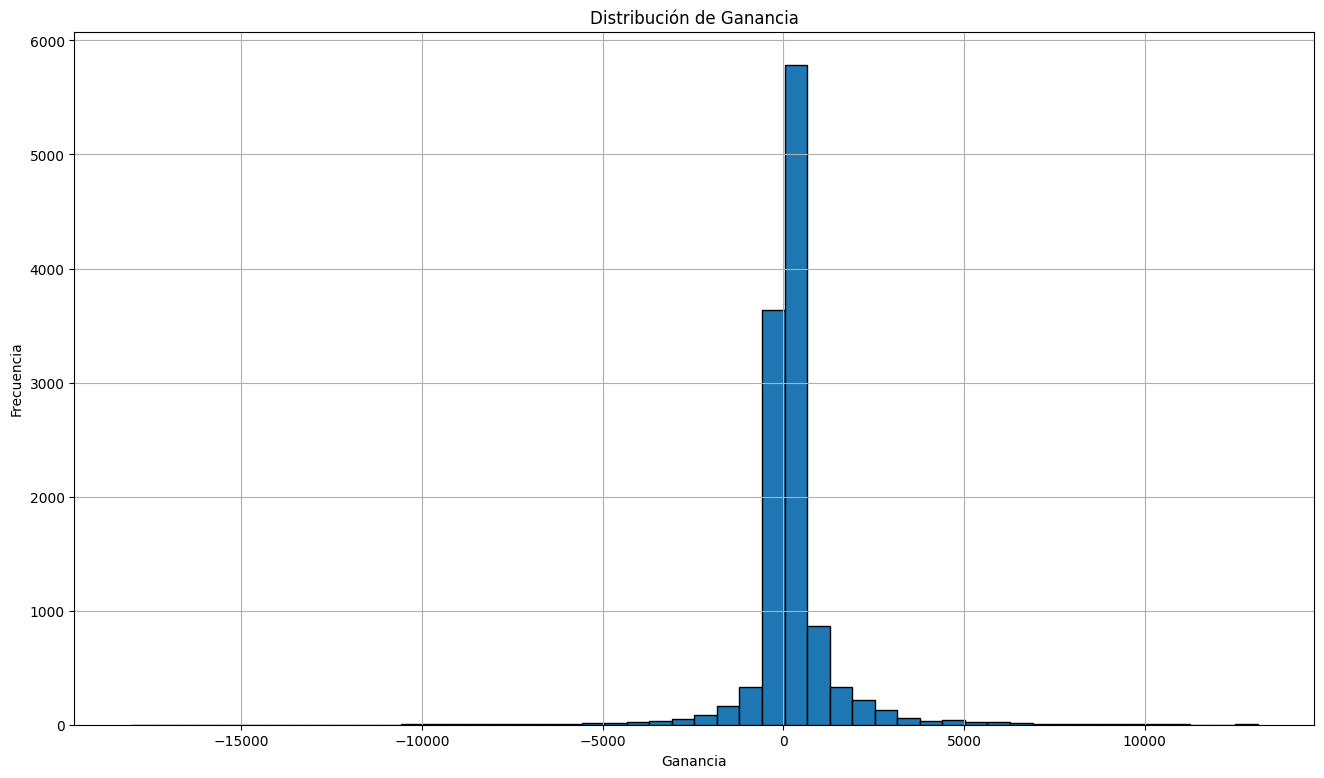

In [6]:
import matplotlib.pyplot as plt

display(df_selected['Ganancia'].describe())

plt.figure(figsize=(16, 9))
plt.hist(df_selected['Ganancia'], bins=50, edgecolor='black')
plt.title('Distribución de Ganancia')
plt.xlabel('Ganancia')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

**Análisis de la relación entre las características y la ganancias**



In [24]:
shipping_mode_profit_sum = df_selected.groupby('Forma de envío')['Ganancia'].sum()
segment_profit_sum = df_selected.groupby('Segmento')['Ganancia'].sum()
country_profit_sum = df_selected.groupby('País/Región')['Ganancia'].sum()
region_profit_sum = df_selected.groupby('Región')['Ganancia'].sum()
subcategory_profit_sum = df_selected.groupby('Subcategoría')['Ganancia'].sum()

print("Distribución Porcentual de la Ganancia por Forma de Envío:")
display((shipping_mode_profit_sum / shipping_mode_profit_sum.sum() * 100).round(2).sort_values(ascending=False))

print("\nDistribución Porcentual de la Ganancia por Segmento:")
display((segment_profit_sum / segment_profit_sum.sum() * 100).round(2).sort_values(ascending=False))

print("\nDistribución Porcentual de la Ganancia por País/Región:")
# Handle cases where the sum is 0 or negative to avoid division by zero or misleading percentages
country_profit_distribution = (country_profit_sum / country_profit_sum.sum() * 100).round(2)
# Replace inf/-inf with 0 or NaN if necessary, though with sum() it's unlikely
country_profit_distribution = country_profit_distribution.replace([float('inf'), float('-inf')], 0)
display(country_profit_distribution.sort_values(ascending=False))


print("\nDistribución Porcentual de la Ganancia por Región:")
display((region_profit_sum / region_profit_sum.sum() * 100).round(2).sort_values(ascending=False))

print("\nDistribución Porcentual de la Ganancia por Subcategoría:")
display((subcategory_profit_sum / subcategory_profit_sum.sum() * 100).round(2).sort_values(ascending=False))

Distribución Porcentual de la Ganancia por Forma de Envío:


,Ganancia
Forma de envío,
Estándar,59.07
Rápido,17.99
Urgente,17.80
Mismo día,5.14



Distribución Porcentual de la Ganancia por Segmento:


,Ganancia
Segmento,
Cliente,56.39
Empresa,25.47
Pequeña empresa,18.14



Distribución Porcentual de la Ganancia por País/Región:


,Ganancia
País/Región,
México,47.21
El Salvador,19.92
Cuba,17.47
Nicaragua,16.31
Brasil,12.97
Guatemala,12.61
Colombia,8.37
Chile,3.18
Bolivia,1.08



Distribución Porcentual de la Ganancia por Región:


,Ganancia
Región,
Norte,47.21
Centro,27.65
Caribe,14.51
Sur,10.63



Distribución Porcentual de la Ganancia por Subcategoría:


,Ganancia
Subcategoría,
Copiadoras,18.70
Sillas,13.43
Teléfonos,13.30
Electrodomésticos,12.31
Accesorios,11.89
Librerías,11.43
Almacenamiento,7.61
Suministros,3.39
Arte,2.96


**Análisis de Factores Clave y Modelado Predictivo de Ganancia en Supertienda**

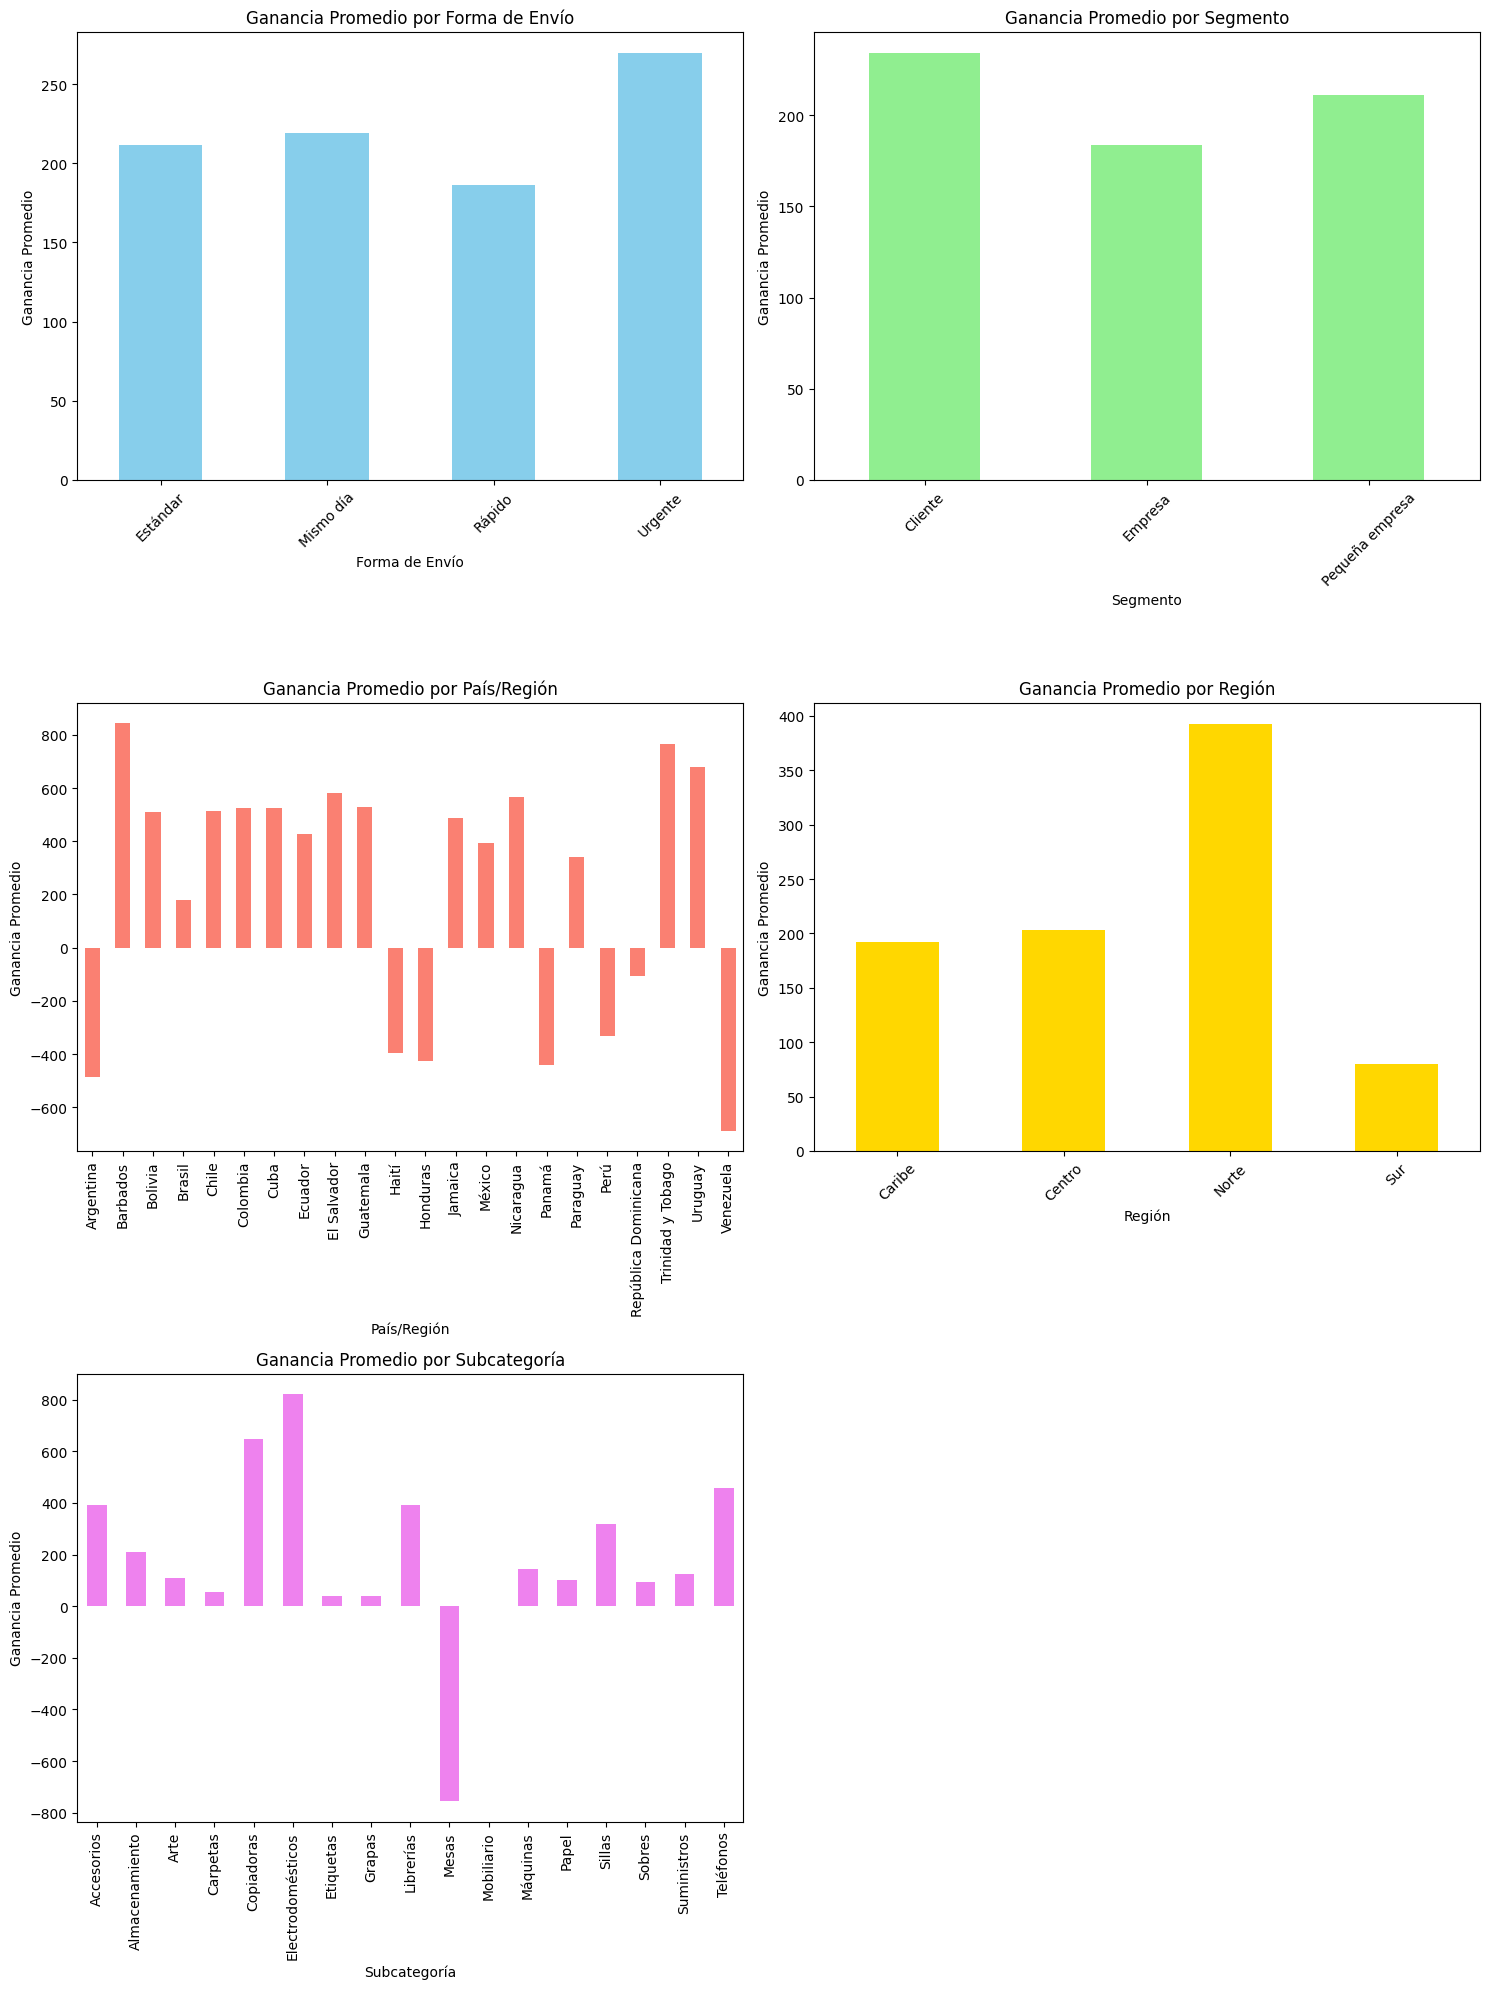

In [25]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))
axes = axes.flatten()

# Calculate average profit for each category
shipping_mode_profit_mean = df_selected.groupby('Forma de envío')['Ganancia'].mean()
segment_profit_mean = df_selected.groupby('Segmento')['Ganancia'].mean()
country_profit_mean = df_selected.groupby('País/Región')['Ganancia'].mean()
region_profit_mean = df_selected.groupby('Región')['Ganancia'].mean()
subcategory_profit_mean = df_selected.groupby('Subcategoría')['Ganancia'].mean()


shipping_mode_profit_mean.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Ganancia Promedio por Forma de Envío')
axes[0].set_xlabel('Forma de Envío')
axes[0].set_ylabel('Ganancia Promedio')
axes[0].tick_params(axis='x', rotation=45)

segment_profit_mean.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Ganancia Promedio por Segmento')
axes[1].set_xlabel('Segmento')
axes[1].set_ylabel('Ganancia Promedio')
axes[1].tick_params(axis='x', rotation=45)

country_profit_mean.plot(kind='bar', ax=axes[2], color='salmon')
axes[2].set_title('Ganancia Promedio por País/Región')
axes[2].set_xlabel('País/Región')
axes[2].set_ylabel('Ganancia Promedio')
axes[2].tick_params(axis='x', rotation=90)

region_profit_mean.plot(kind='bar', ax=axes[3], color='gold')
axes[3].set_title('Ganancia Promedio por Región')
axes[3].set_xlabel('Región')
axes[3].set_ylabel('Ganancia Promedio')
axes[3].tick_params(axis='x', rotation=45)

subcategory_profit_mean.plot(kind='bar', ax=axes[4], color='violet')
axes[4].set_title('Ganancia Promedio por Subcategoría')
axes[4].set_xlabel('Subcategoría')
axes[4].set_ylabel('Ganancia Promedio')
axes[4].tick_params(axis='x', rotation=90)

fig.delaxes(axes[5]) # Remove the unused subplot

plt.tight_layout()
plt.show()

**Análisis de la relación Venta y ganancia**




Coeficiente de correlación entre Venta y Ganancia: 0.41193910531669


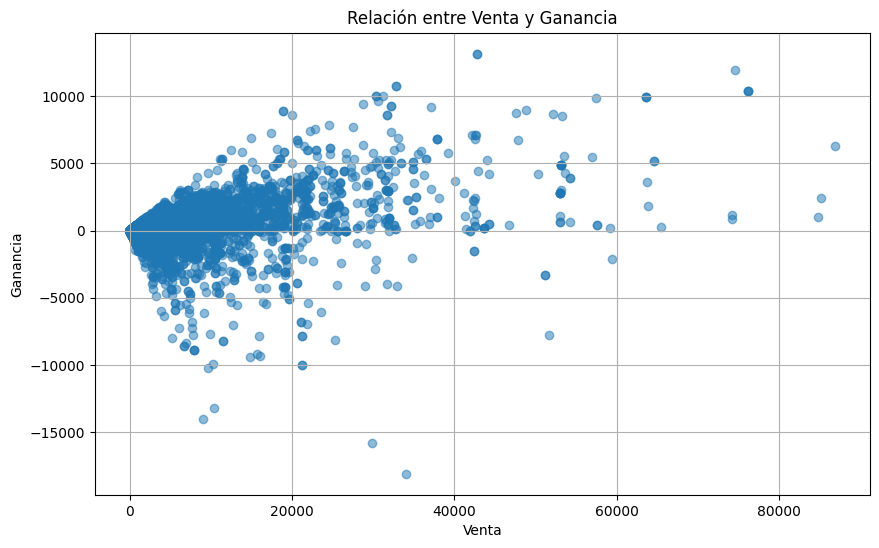

In [26]:
import matplotlib.pyplot as plt

correlation = df_selected['Venta'].corr(df_selected['Ganancia'])
print(f"Coeficiente de correlación entre Venta y Ganancia: {correlation}")

plt.figure(figsize=(10, 6))
plt.scatter(df_selected['Venta'], df_selected['Ganancia'], alpha=0.5)
plt.title('Relación entre Venta y Ganancia')
plt.xlabel('Venta')
plt.ylabel('Ganancia')
plt.grid(True)
plt.show()

**Análisis de la relación entre las características y la ganancia**



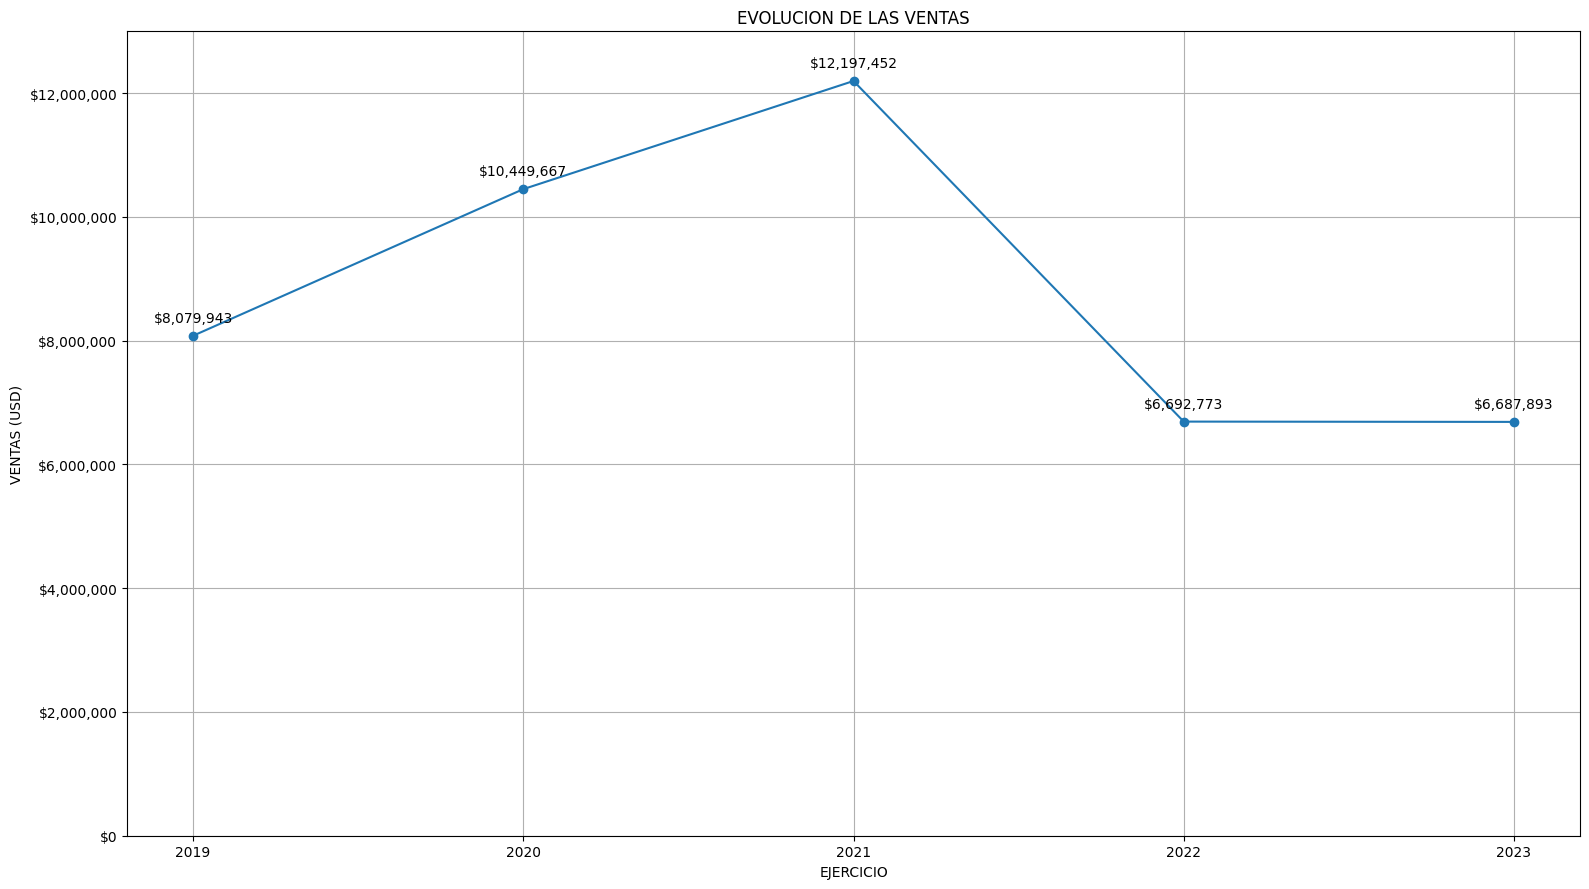

In [27]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

df['Año del pedido'] = df['Fecha del pedido'].dt.year
ventas_anuales = df.groupby('Año del pedido')['Venta'].sum()

plt.figure(figsize=(16, 9))
plt.plot(ventas_anuales.index, ventas_anuales.values, marker='o', linestyle='-')
plt.title('EVOLUCION DE LAS VENTAS')
plt.xlabel('EJERCICIO')
plt.ylabel('VENTAS (USD)')
plt.grid(True)

ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
ax.yaxis.set_major_locator(plt.MultipleLocator(2000000))
plt.ylim(0, 13000000)

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
plt.xticks(ventas_anuales.index.astype(int))

for year, sales in ventas_anuales.items():
    ax.annotate(f'${sales:,.0f}', (year, sales), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()


# Modelo de Regresión Lineal

**Preparación de los datos**




In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

excel_file_path = '/content/sample_data/Supertienda.xlsx'
df = pd.read_excel(excel_file_path)

selected_columns = ['Fecha del pedido', 'Forma de envío', 'Segmento', 'País/Región', 'Región', 'Subcategoría', 'Venta', 'Ganancia']
df_selected = df[selected_columns].copy()

X = df_selected.drop(['Fecha del pedido', 'Ganancia'], axis=1)
y = df_selected['Ganancia']

categorical_cols = ['Forma de envío', 'Segmento', 'País/Región', 'Región', 'Subcategoría']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

display(X.head())

,Venta,Forma de envío_Mismo día,Forma de envío_Rápido,Forma de envío_Urgente,Segmento_Empresa,Segmento_Pequeña empresa,País/Región_Barbados,País/Región_Bolivia,País/Región_Brasil,País/Región_Chile,...,Subcategoría_Grapas,Subcategoría_Librerías,Subcategoría_Mesas,Subcategoría_Mobiliario,Subcategoría_Máquinas,Subcategoría_Papel,Subcategoría_Sillas,Subcategoría_Sobres,Subcategoría_Suministros,Subcategoría_Teléfonos
0,160.80,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,111.72,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,669.48,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,652.32,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,4092.60,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**División de los datos**








In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (9571, 46)
Shape of X_test: (2393, 46)
Shape of y_train: (9571,)
Shape of y_test: (2393,)


In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Interpretación del modelo**



In [14]:
import pandas as pd

coefficients = model.coef_
features = X_train.columns

coefficients_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

coefficients_df_sorted = coefficients_df.sort_values(by='Coefficient', ascending=False)

display(coefficients_df_sorted)

,Feature,Coefficient
25,País/Región_Uruguay,909.814999
10,País/Región_Colombia,878.574691
9,País/Región_Chile,863.971773
7,País/Región_Bolivia,775.742399
12,País/Región_Ecuador,755.982856
21,País/Región_Paraguay,732.743240
6,País/Región_Barbados,632.638895
8,País/Región_Brasil,524.049610
34,Subcategoría_Electrodomésticos,454.730454
13,País/Región_El Salvador,361.652644




**Hallazgos clave del análisis de datos**

*   El Error Cuadrático Medio (MSE) en el conjunto de prueba es aproximadamente 909,593.45, lo que indica la diferencia cuadrada promedio entre los valores de ganancia predichos y reales.
*   El Coeficiente de Determinación (R²) en el conjunto de prueba es aproximadamente 0.328, lo que significa que el modelo explica alrededor del 32.8% de la varianza en la 'Ganancia'.
*   El análisis de los coeficientes del modelo reveló que 'País/Región\_Uruguay', 'País/Región\_Colombia' y 'País/Región\_Chile' tuvieron los coeficientes positivos más grandes, lo que sugiere una fuerte asociación positiva con la ganancia.
*   Por el contrario, 'Subcategoría\_Mesas', 'Región\_Sur' y 'País/Región\_Honduras' tuvieron los coeficientes negativos más grandes, lo que indica una fuerte asociación negativa con la ganancia.



# Modelo Random Forest

**Entrenamiento del modelo random forest**




In [15]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**Evaluación del modelo random forerst**



In [16]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error (MSE) for Random Forest on the test set: {mse_rf}")
print(f"R-squared (R²) score for Random Forest on the test set: {r2_rf}")

Mean Squared Error (MSE) for Random Forest on the test set: 590090.4368478506
R-squared (R²) score for Random Forest on the test set: 0.56436517724922



**Análisis de importancia de características**


,Feature,Importance
0,Venta,0.472777
16,País/Región_Honduras,0.059432
38,Subcategoría_Mesas,0.051982
20,País/Región_Panamá,0.032122
8,País/Región_Brasil,0.030640
26,País/Región_Venezuela,0.026880
23,País/Región_República Dominicana,0.026807
4,Segmento_Empresa,0.026342
37,Subcategoría_Librerías,0.023614
34,Subcategoría_Electrodomésticos,0.023317


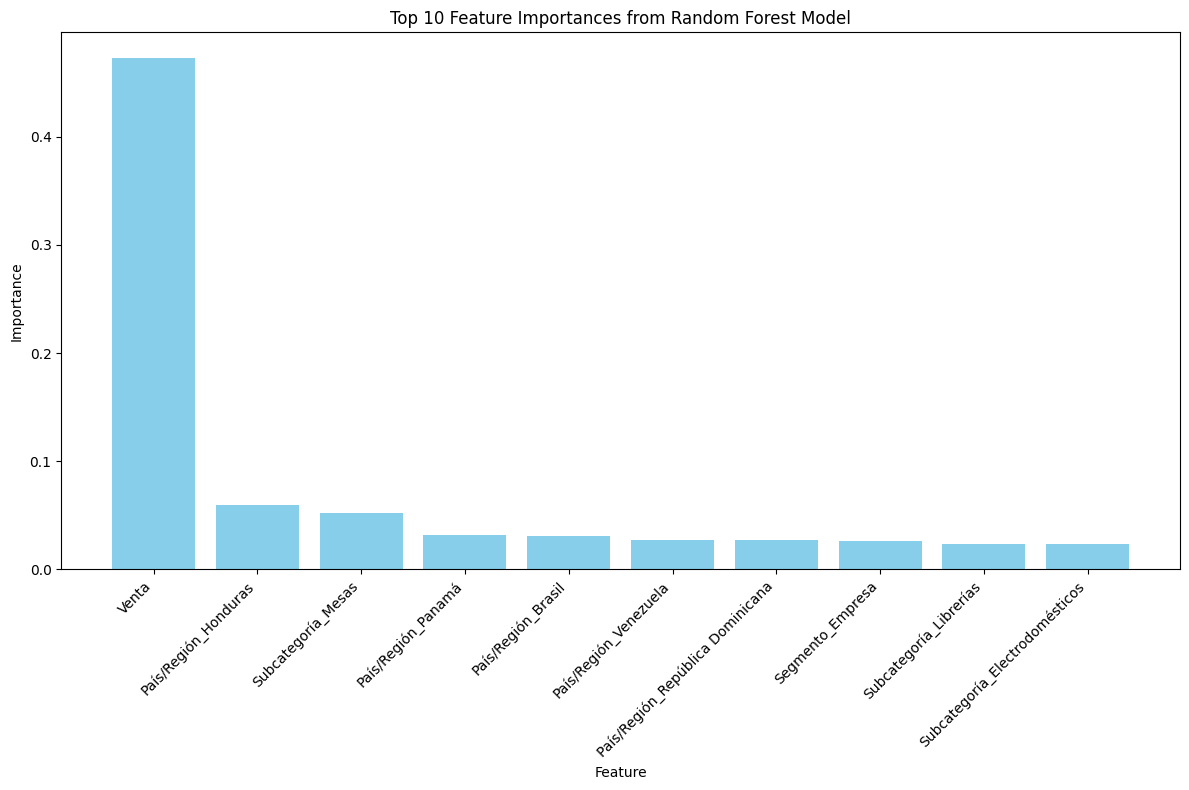

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = rf_model.feature_importances_
features = X_train.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)

display(importance_df_sorted.head(10))

plt.figure(figsize=(12, 8))
plt.bar(importance_df_sorted['Feature'][:10], importance_df_sorted['Importance'][:10], color='skyblue')
plt.title('Top 10 Feature Importances from Random Forest Model')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Resumen del Modelo Random Forest**

* El modelo Random Forest Regressor obtuvo un Error Cuadrático Medio (MSE) de aproximadamente 590,090.44 en el conjunto de prueba, que es significativamente menor que el MSE del modelo de Regresión Lineal (909,593.45).
* El Coeficiente de Determinación (R²) para el modelo Random Forest fue de aproximadamente 0.5644 en el conjunto de prueba, lo que indica que el modelo explica alrededor del 56.44% de la varianza en la 'Ganancia'. Esto es una mejora considerable en comparación con el R² del modelo de Regresión Lineal (0.3285).
* El análisis de importancia de características del modelo Random Forest reveló que la 'Venta' es la característica más influyente en la predicción de la ganancia, seguida por variables categóricas como 'País/Región\_Honduras', 'Subcategoría\_Mesas', 'País/Región\_Panamá' y 'País/Región\_Brasil'. Esto refuerza la importancia de la ubicación y el tipo de producto en la rentabilidad.

# Modelo Catboost


In [18]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.8 MB/s eta 0:00:00


**Entrenar catboost**



In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor

# Load data
excel_file_path = '/content/sample_data/Supertienda.xlsx'
df = pd.read_excel(excel_file_path)

# Select features and target
selected_columns = ['Fecha del pedido', 'Forma de envío', 'Segmento', 'País/Región', 'Región', 'Subcategoría', 'Venta', 'Ganancia']
df_selected = df[selected_columns].copy()

X = df_selected.drop(['Fecha del pedido', 'Ganancia'], axis=1)
y = df_selected['Ganancia']

# One-hot encode categorical features
categorical_cols = ['Forma de envío', 'Segmento', 'País/Región', 'Región', 'Subcategoría']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train CatBoost Regressor model
catboost_model = CatBoostRegressor(random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)

print("CatBoost model trained successfully.")

CatBoost model trained successfully.


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor

excel_file_path = '/content/sample_data/Supertienda.xlsx'
df = pd.read_excel(excel_file_path)

selected_columns = ['Fecha del pedido', 'Forma de envío', 'Segmento', 'País/Región', 'Región', 'Subcategoría', 'Venta', 'Ganancia']
df_selected = df[selected_columns].copy()

X = df_selected.drop(['Fecha del pedido', 'Ganancia'], axis=1)
y = df_selected['Ganancia']

categorical_cols = ['Forma de envío', 'Segmento', 'País/Región', 'Región', 'Subcategoría']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

catboost_model = CatBoostRegressor(random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)

**Analizar importancia de características**

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor

excel_file_path = '/content/sample_data/Supertienda.xlsx'
df = pd.read_excel(excel_file_path)

selected_columns = ['Fecha del pedido', 'Forma de envío', 'Segmento', 'País/Región', 'Región', 'Subcategoría', 'Venta', 'Ganancia']
df_selected = df[selected_columns].copy()

X = df_selected.drop(['Fecha del pedido', 'Ganancia'], axis=1)
y = df_selected['Ganancia']

categorical_cols = ['Forma de envío', 'Segmento', 'País/Región', 'Región', 'Subcategoría']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

catboost_model = CatBoostRegressor(random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)

Feature Importances from CatBoost Model:


,Feature,Importance
0,Venta,37.656087
38,Subcategoría_Mesas,7.028058
16,País/Región_Honduras,6.959339
29,Región_Sur,4.977555
45,Subcategoría_Teléfonos,4.416044
8,País/Región_Brasil,3.882576
23,País/Región_República Dominicana,3.436639
20,País/Región_Panamá,3.423505
34,Subcategoría_Electrodomésticos,3.109700
37,Subcategoría_Librerías,2.697331


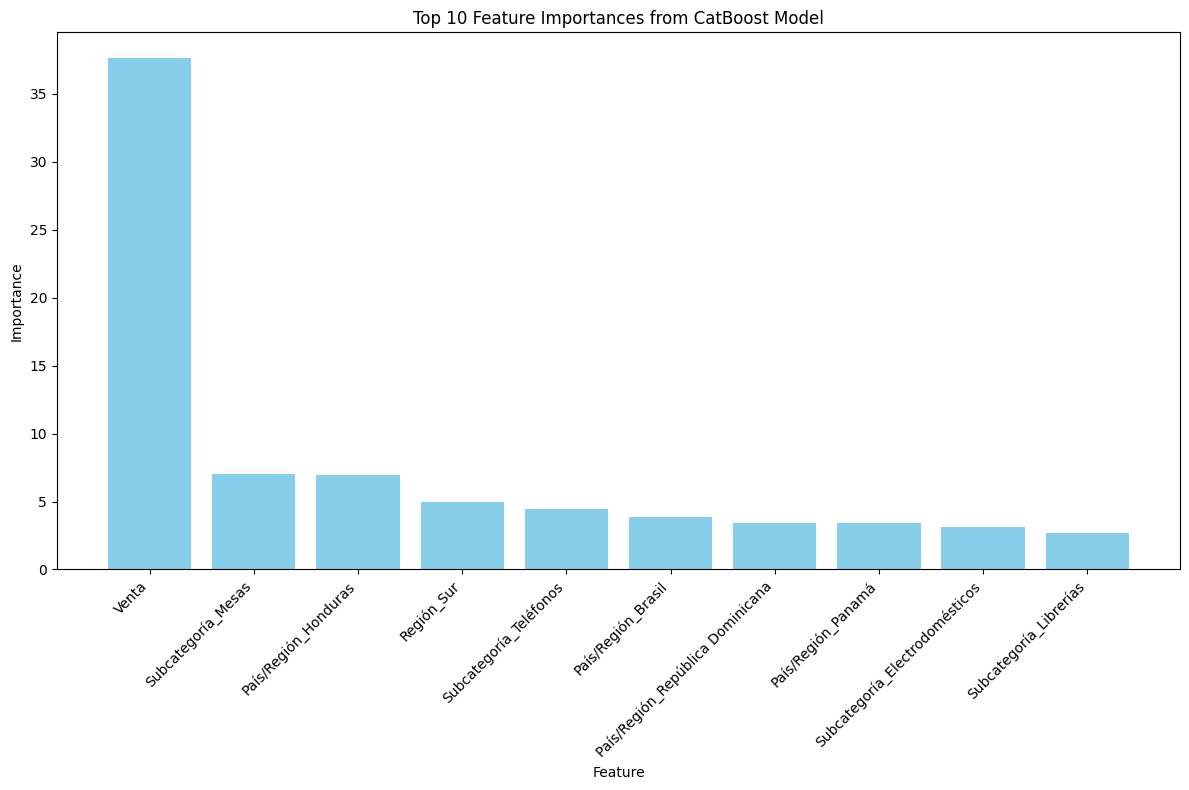

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances_catboost = catboost_model.get_feature_importance()
features_catboost = X_train.columns

importance_df_catboost = pd.DataFrame({
    'Feature': features_catboost,
    'Importance': feature_importances_catboost
})

importance_df_catboost_sorted = importance_df_catboost.sort_values(by='Importance', ascending=False)

print("Feature Importances from CatBoost Model:")
display(importance_df_catboost_sorted.head(10))

plt.figure(figsize=(12, 8))
plt.bar(importance_df_catboost_sorted['Feature'][:10], importance_df_catboost_sorted['Importance'][:10], color='skyblue')
plt.title('Top 10 Feature Importances from CatBoost Model')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_catboost = catboost_model.predict(X_test)

mse_catboost = mean_squared_error(y_test, y_pred_catboost)
r2_catboost = r2_score(y_test, y_pred_catboost)

print(f"Mean Squared Error (MSE) for CatBoost on the test set: {mse_catboost}")
print(f"R-squared (R²) score for CatBoost on the test set: {r2_catboost}")

Mean Squared Error (MSE) for CatBoost on the test set: 613232.8334763284
R-squared (R²) score for CatBoost on the test set: 0.5472802810642736


**Resumen de la Comparación de Modelos**

Basado en la tabla comparativa de modelos:

*   El modelo de **Regresión Lineal** tuvo el MSE más alto (aproximadamente 909,593.45) y el R² más bajo (aproximadamente 0.3285), indicando que es el que peor rendimiento tuvo de los tres para predecir la ganancia.
*   El modelo **Random Forest** obtuvo un MSE significativamente menor (aproximadamente 590,090.44) y un R² considerablemente mayor (aproximadamente 0.5644) en comparación con la Regresión Lineal.
*   El modelo **CatBoost** también mostró un rendimiento mucho mejor que la Regresión Lineal, con un MSE (aproximadamente 613,232.83) y un R² (aproximadamente 0.5473) cercanos a los de Random Forest.

En general, tanto **Random Forest como CatBoost superaron notablemente a la Regresión Lineal**, lo que sugiere que las relaciones en los datos son más complejas que una simple relación lineal. Entre Random Forest y CatBoost, **Random Forest** mostró métricas ligeramente mejores (menor MSE y mayor R²), indicando que fue el modelo con mejor rendimiento en este conjunto de datos particular.

# **Conclusiones**

Basado en el análisis exploratorio de datos y el desarrollo de modelos predictivos de ganancia en Supertienda, se extraen las siguientes conclusiones principales:

*   **Factores Clave de Ganancia:** Las variables 'Venta', 'País/Región' y 'Subcategoría' se identificaron como los factores más influyentes en la ganancia, lo cual valida las hipótesis planteadas *inicialmente*. La magnitud de la venta tiene una relación positiva con la ganancia, mientras que ciertas regiones y subcategorías muestran diferencias significativas en la rentabilidad promedio, incluyendo algunas con pérdidas importantes.
*   **Rendimiento de los Modelos Predictivos:** Los modelos de ensemble, Random Forest y CatBoost, superaron significativamente al modelo de Regresión Lineal en la predicción de la ganancia. Esto indica que las relaciones entre las características y la ganancia son complejas y no se explican completamente por un modelo lineal simple.
*   **Mejor Modelo:** Entre los modelos evaluados, el modelo Random Forest mostró un rendimiento ligeramente superior en términos de Error Cuadrático Medio (MSE) y Coeficiente de Determinación (R²) en el conjunto de prueba. Por lo tanto, Random Forest se considera el modelo más adecuado para predecir la ganancia en este conjunto de datos.
*   **Implicaciones:** Los hallazgos resaltan la importancia estratégica de monitorear de cerca las ventas, analizar el rendimiento por región y subcategoría, y potencialmente ajustar estrategias comerciales o de precios para optimizar la rentabilidad en áreas o productos con bajas ganancias o pérdidas.

# **Recomendaciones para Supertienda**

Basado en el análisis exploratorio de datos y el modelado predictivo de ganancia, se proponen las siguientes recomendaciones para Supertienda con el fin de recuperar el posicionamiento en el mercado y optimizar la ganancia:

**Forma de Envío:**
* **Analizar la rentabilidad por forma de envío:** Aunque la forma de envío "Estándar" representa el mayor porcentaje de ganancia total, es crucial analizar si las otras formas de envío ("Rápido", "Urgente", "Mismo día") son rentables individualmente o si están generando pérdidas que contrarrestan las ganancias.
* **Optimizar costos de envío:** Investigar formas de reducir los costos asociados a las formas de envío menos rentables, como negociar mejores tarifas con los transportistas o explorar opciones de logística más eficientes.
* **Estrategia de precios:** Considerar ajustar los precios de los productos o los costos de envío para las formas de envío menos rentables, sin afectar negativamente la satisfacción del cliente.

**Segmento:**
* **Identificar segmentos clave:** Aunque el segmento "Cliente" contribuye con la mayor parte de la ganancia total, es importante analizar la rentabilidad de los segmentos "Empresa" y "Pequeña empresa" para identificar oportunidades de crecimiento o áreas que requieran atención.
* **Campañas de marketing dirigidas:** Desarrollar estrategias de marketing específicas para los segmentos más rentables o para aquellos con potencial de crecimiento, enfocándose en sus necesidades y preferencias.
* **Programas de fidelización:** Implementar programas de fidelización para los clientes de alto valor en cada segmento, incentivando la repetición de compras y fortaleciendo la relación con ellos.

**País/Región:**
* **Análisis detallado por país/región:** Investigar a fondo por qué algunos países y regiones tienen ganancias promedio significativamente diferentes. Esto podría deberse a factores como la competencia local, las regulaciones, los costos operativos o las preferencias del consumidor.
* **Estrategias localizadas:** Adaptar las estrategias de marketing, ventas y precios a las condiciones específicas de cada país y región, capitalizando las fortalezas y abordando las debilidades.
* **Evaluar la viabilidad en países/regiones con pérdidas:** Para los países/regiones que muestran pérdidas significativas, realizar un análisis costo-beneficio para determinar si es viable continuar operando en ellos o si se requieren cambios drásticos en la estrategia.

**Subcategoría:**
* **Identificar subcategorías de alta y baja rentabilidad:** Prestar especial atención a las subcategorías que generan altas ganancias (como "Copiadoras", "Sillas", "Teléfonos") y a aquellas que generan pérdidas significativas (como "Mesas").
* **Estrategias para subcategorías de baja rentabilidad:** Para las subcategorías con pérdidas, explorar opciones como optimizar la gestión de inventario, ajustar precios, mejorar la calidad del producto o incluso considerar la discontinuación si no son estratégicamente importantes.
* **Promocionar subcategorías de alta rentabilidad:** Impulsar las ventas de las subcategorías más rentables a través de campañas de marketing, promociones y una mejor visibilidad en la plataforma de venta.

**Venta y Ganancia:**
* **Analizar la relación entre venta y ganancia:** Aunque existe una correlación positiva entre venta y ganancia, es fundamental entender por qué algunas ventas grandes resultan en pérdidas significativas. Esto podría estar relacionado con descuentos excesivos, costos operativos elevados o problemas en la cadena de suministro.
* **Optimizar la estrategia de descuentos:** Establecer políticas de descuento claras y basadas en la rentabilidad para evitar que las promociones afecten negativamente la ganancia.
* **Mejorar la eficiencia operativa:** Identificar y abordar los cuellos de botella en la cadena de suministro, el procesamiento de pedidos y la logística para reducir los costos operativos y mejorar la rentabilidad general.
* **Monitorear métricas clave:** Establecer un sistema de monitoreo continuo de las métricas de venta, ganancia, costos y otras variables relevantes para identificar tendencias, detectar problemas a tiempo y tomar decisiones informadas.

Implementando estas recomendaciones, Supertienda podrá tomar decisiones estratégicas más informadas, optimizar sus operaciones y mejorar su rentabilidad en el mercado.